# Pré Processamento dos Dados - Base de dados de serviços de telecomunicações

Utilizando uma base de churn, que diz respeito a serviços de internet, telefone e tv - Telecomunicação.

Realizarei aqui as etapas de limpeza e tratamento de dados.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
#Carregando a base de dados
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim | Não)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




### 1 - Carregando a base, verificando se os tipos de dados estão de acordo com cada coluna e transformando os tipos de dados.

In [34]:
#Verificando os tipos de dados de cada coluna e se possuem dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [35]:
#Transformando os dados da coluna 'Idoso' em str e alterando os valores
df['Idoso'] = df['Idoso'].replace(0, 'nao')
df['Idoso'] = df['Idoso'].replace(1, 'sim')
df['Idoso'].unique()

array(['nao', 'sim'], dtype=object)

In [36]:
#Conferindo as alterações realizadas
df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,nao,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,nao,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,nao,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,nao,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,nao,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,nao,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,nao,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,nao,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,nao,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,nao,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


### 2 - Verificando se temos colunas com dados faltantes e trazendo a % dos dados faltantes por coluna.

In [37]:
#Verificando a quantidade de dados faltante e trazendo a porcentagem por coluna
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

#### Analisando os dados acima podemos observar que na coluna 'Genero' e 'Churn' possuímos poucos dados ausentes ou nulos, por outro lado a coluna PhoneService que é uma coluna importante para fazer uma análise de Churn possui uma porcentagem alta de dados ausentes ou nulos o mesmo vale para a coluna 'Pagamento_Mensal'.

### 3 - Excluindo as linhas das colunas com dados ausentes ou nulos que analisando as informações acima que será o método ideal para o andamento da análise.

In [38]:
#Verificando se os dados ficarão enviesados em caso de exclusão dos dados nulos da coluna 'Genero'
df[df['Genero'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,nao,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,nao,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,nao,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,nao,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,nao,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,nao,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN
10,9763-GRSKD,NaN,nao,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,No
11,7469-LKBCI,NaN,nao,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,No
12,8091-TTVAX,NaN,nao,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,No
13,0280-XJGEX,NaN,nao,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,Yes


#### Estou excluindo os dados faltantes da coluna 'Genero', pois são poucos dados para influênciar negativamente o decorrer do projeto, para ser mais preciso 0,20%

In [39]:
#Excluindo os dados nulos da coluna 'Genero'
df.dropna(subset=['Genero'], inplace=True)

df['Genero'].isnull().sum()

np.int64(0)

In [40]:
#Verificando se existem dados faltantes na coluna 'Churn' após a exclusão dos dados faltantes da coluna 'Genero'
df['Churn'].isnull().sum()

np.int64(0)

## 3 - Nessa etapa irei substituir pela média ou mediana as linhas das colunas com valores nulos que identifiquei após análise que é o melhor método.

**Dica variáveis numéricas:** Verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Substituir uma variável categórica utilize um gráficos, como de barras para verificar a que mais aparece e utilizar ela na substituição.

#### Estou substituindo a coluna 'Pagamento_Mensal', pois é uma coluna importante para a análise de churn dos serviços de comunicação. Em caso de exclusão perderia 13% de dados importantes para analisar clientes perdidos em decorrência de churn.

#### Verificando abaixo a distribuição dos dados, comparando a média e a mediana, através dessa análise irei escolher qual das duas irei utilizar para substituir os valor ausentes ou nulos da coluna 'Pagamento_Mensal'

In [41]:
#Média dos valores da coluna 'Pagamento_Mensal'
media_pagamento_mensal = df['Pagamento_Mensal'].mean()
print(media_pagamento_mensal)

65.60756321839081


In [42]:
#Mediana dos valores da coluna 'Pagamento_Mensal'
df['Pagamento_Mensal'].median()

71.45

#### Plotando um gráfico boxplot para verificar possíveis outliers na coluna 'Pagamento_Mensal'

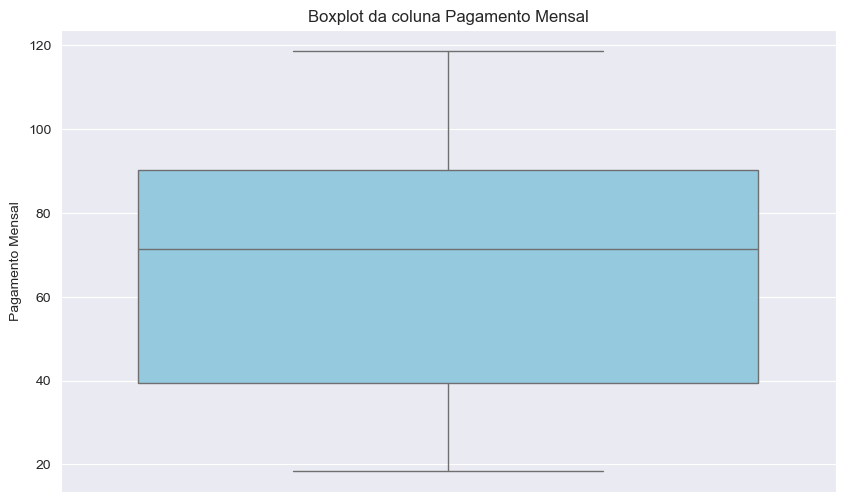

In [43]:
#Plotando um gráfico boxplot
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da coluna Pagamento Mensal')
plt.ylabel('Pagamento Mensal')
plt.show()

#### Verificando o boxplot acima identificamos que não possuem outliers na coluna 'Pagamento_Mensal'.

#### Os valores de média e mediana estão próximos isso quer dizer que a distribuição dos dados está boa, irei substituir os dados faltantes da coluna 'Pagamento_Mensal' pela média.

In [44]:
#Substituindo os valores faltantes da coluna 'Pagamento_Mensal' pela média
df['Pagamento_Mensal'].fillna(media_pagamento_mensal, inplace=True)
df['Pagamento_Mensal'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_41092\2790219852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(media_pagamento_mensal, inplace=True)


np.int64(0)

#### Estou substituindo a coluna 'PhoneService', pois é uma coluna importante para a análise de churn dos serviços de comunicação. Em caso de exclusão perderia 59,28% de dados importantes para analisar clientes que possuíam Serviços Telefonicos perdidos em decorrência de churn.

#### Verificando a porcentagem de clientes que possuem e não possuem Serviços Telefônicos

In [45]:
df['PhoneService'].value_counts(normalize=True) * 100

PhoneService
Yes    91.451292
No      8.548708
Name: proportion, dtype: float64

#### Verificando se existe algum padrão nos dados faltantes da coluna 'PhoneService', para evitar viés.

In [46]:
#Verificando se existe algum padrão nos dados faltantes da coluna 'PhoneService'
df[df['PhoneService'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
161,0867-MKZVY,Female,nao,Yes,No,20,NaN,Fiber optic,Yes,No,No,Month-to-month,Electronic check,65.607563,1592.35,Yes
162,4482-EWFMI,Female,nao,No,No,2,NaN,Fiber optic,No,No,No,Month-to-month,Electronic check,65.607563,135.20,No
163,4648-YPBTM,Male,nao,No,No,53,NaN,DSL,No,Yes,No,Two year,Bank transfer (automatic),65.607563,3958.25,No
164,2907-ILJBN,Female,nao,Yes,Yes,11,NaN,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,233.90,No
165,6345-FZOQH,Male,nao,Yes,No,69,NaN,No,No internet service,No internet service,No internet service,Two year,Mailed check,65.607563,1363.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,8883-ANODQ,Female,nao,Yes,Yes,68,NaN,Fiber optic,No,No,No,Two year,Credit card (automatic),84.400000,5746.75,No
1639,4690-LLKUA,Male,sim,No,No,17,NaN,DSL,No,No,No,Month-to-month,Electronic check,45.050000,770.60,Yes
1640,2351-RRBUE,Female,nao,Yes,Yes,7,NaN,No,No internet service,No internet service,No internet service,One year,Mailed check,20.650000,134.05,No
1641,5980-BDHPY,Male,nao,Yes,No,72,NaN,DSL,Yes,Yes,Yes,Two year,Bank transfer (automatic),87.100000,6230.10,No


#### Optei por substituir os dados nulos da coluna 'PhoneService' por Yes, pois o Yes é 91,45% da coluna, ou seja a chance de acerto é de 91,45%, os dados da coluna 'PhoneService' são importantes para uma posterior análise de churn, por esse motivo não exclui essa linhas.

In [47]:
#Substituindo os dados nulos da coluna 'PhoneService' por Yes
df['PhoneService'].fillna('Yes', inplace=True)
df['PhoneService'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_41092\2522312376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhoneService'].fillna('Yes', inplace=True)


np.int64(0)

#### Observando o código abaixo identificamos que o "Yes" aumentou 5,09% e o "No" diminuiu 5,09%, após aplicar aos dados nulos da coluna 'PhoneService' o valor "Yes".

In [48]:
df['PhoneService'].value_counts(normalize=True) * 100

PhoneService
Yes    96.543408
No      3.456592
Name: proportion, dtype: float64

## 4 - Tratando valores digitados incorretamente, com letras maiúsculas ou minúsculas, valores iguais porém escritos de forma dirente e traduzindo os valores para padronizar.

#### Verificando dados digitados incorretamente, traduzindo e padronizando os valores do DataFrame

In [49]:
df['Genero'] = df['Genero'].replace('Female', 'feminino')
df['Genero'] = df['Genero'].replace('F', 'feminino')
df['Genero'] = df['Genero'].replace('f', 'feminino')
df['Genero'] = df['Genero'].replace('Male', 'masculino')
df['Genero'] = df['Genero'].replace('M', 'masculino')
df['Genero'].unique()

array(['feminino', 'masculino'], dtype=object)

In [50]:
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No internet service', 'nao')
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No', 'nao')
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('Yes', 'sim')
df['Servico_Seguranca'].unique()

array(['nao', 'sim'], dtype=object)

In [51]:
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('No internet service', 'nao')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('No', 'nao')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('Yes', 'sim')
df['Suporte_Tecnico'].unique()

array(['nao', 'sim'], dtype=object)

In [52]:
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'nao')
df['StreamingTV'] = df['StreamingTV'].replace('No', 'nao')
df['StreamingTV'] = df['StreamingTV'].replace('Yes', 'sim')
df['StreamingTV'].unique()

array(['nao', 'sim'], dtype=object)

In [53]:
df['Casado'] = df['Casado'].replace('No', 'nao')
df['Casado'] = df['Casado'].replace('Yes', 'sim')
df['Casado'].unique()

array(['sim', 'nao'], dtype=object)

In [54]:
df['Dependents'] = df['Dependents'].replace('No', 'nao')
df['Dependents'] = df['Dependents'].replace('Yes', 'sim')
df['Dependents'].unique()

array(['nao', 'sim'], dtype=object)

In [55]:
df['Servico_Internet'] = df['Servico_Internet'].replace('No', 'nao')
df['Servico_Internet'] = df['Servico_Internet'].replace('DSL', 'dsl')
df['Servico_Internet'] = df['Servico_Internet'].replace('Fiber optic', 'fibra otica')
df['Servico_Internet'].unique()

array(['dsl', 'nao', 'fibra otica'], dtype=object)

In [56]:
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace('Month-to-month', 'mes a mes')
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace('One year', 'um ano')
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace('Two year', 'dois anos')
df['Tipo_Contrato'].unique()

array(['mes a mes', 'um ano', 'dois anos'], dtype=object)

In [57]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 'cheque eletronico')
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 'cheque enviado')
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'transferencia bancaria automatica')
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'cartao de credito automatico')
df['PaymentMethod'].unique()

array(['cheque eletronico', 'cheque enviado',
       'transferencia bancaria automatica',
       'cartao de credito automatico'], dtype=object)

In [28]:
df['Churn'] = df['Churn'].replace('No', 'nao')
df['Churn'] = df['Churn'].replace('Yes', 'sim')
df['Churn'].unique()

array(['nao', 'sim'], dtype=object)

In [29]:
# Transformando todos os dados da coluna 'PhoneService' em minúsculo
df['PhoneService'] = df['PhoneService'].str.lower()
df['PhoneService'].unique()

array(['no', 'yes'], dtype=object)

## 5 - Alterando os nomes das colunas e traduzindo para o português, para padronizar o DataFrame.

In [30]:
df.rename(columns={'Dependents':'Dependentes'}, inplace=True)
df.rename(columns={'PhoneService':'Servico_Telefonico'}, inplace=True)
df.rename(columns={'StreamingTV':'Streaming_TV'}, inplace=True)
df.rename(columns={'PaymentMethod':'Metodo_Pagamento'}, inplace=True)

In [31]:
df.head(10)

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,feminino,nao,sim,nao,1,no,dsl,nao,nao,nao,mes a mes,cheque eletronico,29.850000,29.85,nao
1,5575-GNVDE,masculino,nao,nao,nao,34,yes,dsl,sim,nao,nao,um ano,cheque enviado,56.950000,1889.50,nao
2,3668-QPYBK,masculino,nao,nao,nao,2,yes,dsl,sim,nao,nao,mes a mes,cheque enviado,53.850000,108.15,sim
3,7795-CFOCW,masculino,nao,nao,nao,45,no,dsl,sim,sim,nao,um ano,transferencia bancaria automatica,65.607563,1840.75,nao
16,8191-XWSZG,feminino,nao,nao,nao,52,yes,nao,nao,nao,nao,um ano,cheque enviado,65.607563,1022.95,nao
17,9959-WOFKT,masculino,nao,nao,sim,71,yes,fibra otica,sim,nao,sim,dois anos,transferencia bancaria automatica,65.607563,7382.25,nao
18,4190-MFLUW,feminino,nao,sim,sim,10,yes,dsl,nao,sim,nao,mes a mes,cartao de credito automatico,65.607563,528.35,sim
19,4183-MYFRB,feminino,nao,nao,nao,21,yes,fibra otica,nao,nao,nao,mes a mes,cheque eletronico,65.607563,1862.90,nao
20,8779-QRDMV,masculino,sim,nao,nao,1,no,dsl,nao,nao,nao,mes a mes,cheque eletronico,65.607563,39.65,sim
21,1680-VDCWW,masculino,nao,sim,nao,12,yes,nao,nao,nao,nao,um ano,transferencia bancaria automatica,65.607563,202.25,nao


## 6 - Excluindo colunas que não utilizarei ao decorrer do projeto.

In [112]:
# Excluindo coluna 'customerID'
df.drop(columns=['customerID'], inplace=True)

In [114]:
df.head(10)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,feminino,nao,sim,nao,1,No,dsl,nao,nao,nao,mes a mes,cheque eletronico,29.850000,29.85,nao
1,masculino,nao,nao,nao,34,Yes,dsl,sim,nao,nao,um ano,cheque enviado,56.950000,1889.50,nao
2,masculino,nao,nao,nao,2,Yes,dsl,sim,nao,nao,mes a mes,cheque enviado,53.850000,108.15,sim
3,masculino,nao,nao,nao,45,No,dsl,sim,sim,nao,um ano,transferencia bancaria automatica,65.607563,1840.75,nao
16,feminino,nao,nao,nao,52,Yes,nao,nao,nao,nao,um ano,cheque enviado,65.607563,1022.95,nao
17,masculino,nao,nao,sim,71,Yes,fibra otica,sim,nao,sim,dois anos,transferencia bancaria automatica,65.607563,7382.25,nao
18,feminino,nao,sim,sim,10,Yes,dsl,nao,sim,nao,mes a mes,cartao de credito automatico,65.607563,528.35,sim
19,feminino,nao,nao,nao,21,Yes,fibra otica,nao,nao,nao,mes a mes,cheque eletronico,65.607563,1862.90,nao
20,masculino,sim,nao,nao,1,No,dsl,nao,nao,nao,mes a mes,cheque eletronico,65.607563,39.65,sim
21,masculino,nao,sim,nao,12,Yes,nao,nao,nao,nao,um ano,transferencia bancaria automatica,65.607563,202.25,nao
